In [125]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
import math

from scipy import signal

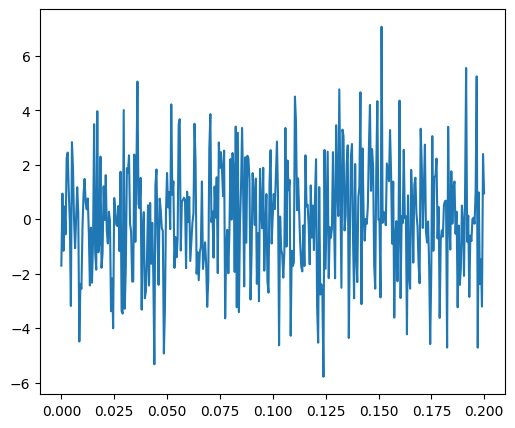

In [126]:
# Seed the random number generator
np.random.seed(1234)

f = 200 # speaking frequency range is within 100-300hz
time_step = 1/(2*1000+1) # nyquist rate > 2*f
period = 1/f

time_vec = np.arange(0, .2, time_step)
sig = (np.sin(2 * np.pi *f * time_vec) 
       + .3*np.sign(2*np.pi*f)* np.random.randn(time_vec.size) # background noise at same freq (can be other people talking)
       + 2*np.cos(1e3*np.pi*2)*np.random.randn(time_vec.size) # noise at 1khz (powerful static feedback)
       ) 
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.show()

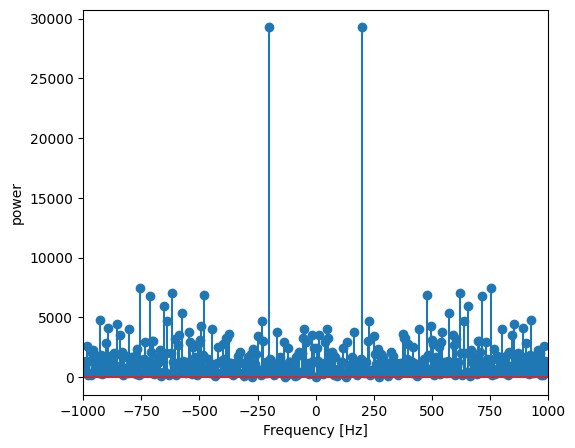

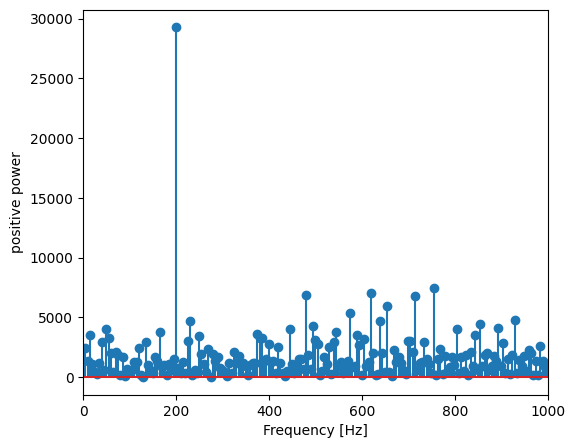

In [127]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
getPower = lambda fft: np.abs(fft)**2
power = getPower(sig_fft)
# power = sig_fft
# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
expected_max=5*f
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.stem(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.xlim(-expected_max,expected_max)

# # Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
plt.figure(figsize=(6, 5))
plt.stem(freqs, power[pos_mask])
plt.xlabel('Frequency [Hz]')
plt.ylabel('positive power')
plt.xlim(0,expected_max)
plt.show()

# # Check that it does indeed correspond to the frequency that we generate
# # the signal with
# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
# plt.plot(freqs[:8], power[:8])
# plt.setp(axes, yticks=[])
# plt.show()
# # scipy.signal.find_peaks_cwt can also be used for more advanced
# # peak detection

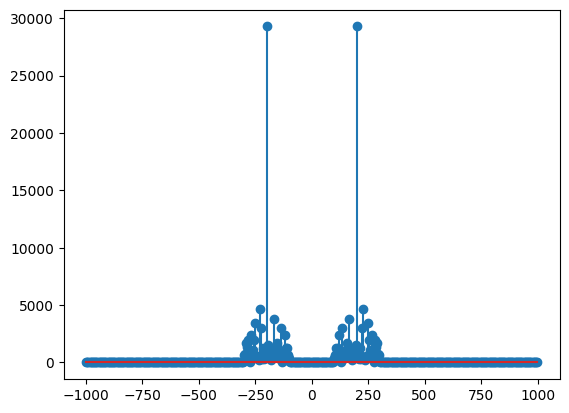

In [128]:
# Remove High and Low Freq
high_freq_fft = sig_fft.copy()
high_freq_fft[(np.abs(sample_freq) > peak_freq+100)|(np.abs(sample_freq) < peak_freq-100)] = 0 #BW of 200hz
plt.stem(sample_freq,getPower(high_freq_fft))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


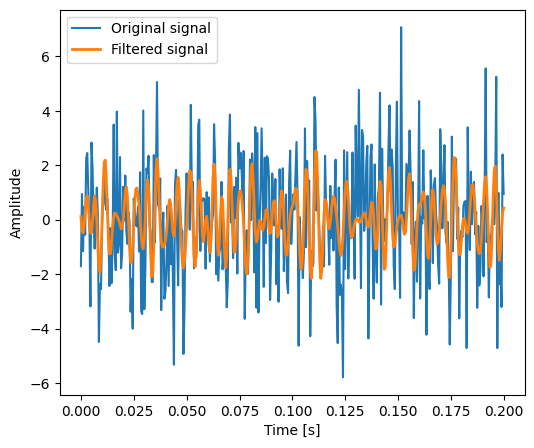

In [131]:
filtered_sig = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=2, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


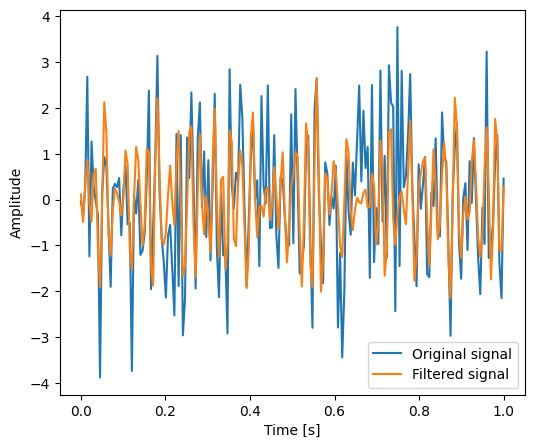

In [130]:
# Plot at desired frequency sampling rate
samples=int(len(sig)/2)
# samples=1000

t_sample = np.linspace(0,1,samples)
# y_sample = signal.resample(filtered_sig,t_sample)
plt.figure(figsize=(6, 5))
plt.plot(t_sample, signal.resample(sig,samples), label='Original signal')
plt.plot(t_sample, signal.resample(filtered_sig,samples), label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
plt.show()